<h1 style="text-align: center;">Intermediate Python: Physics Practice Problems - Solution </h1>
<h3 style="text-align: center;"> Author      : Edgar Carrillo </h3>
<h3 style="text-align: center;">Created     : 2024-08-03  </h3>
<h3 style="text-align: center;"> Last Modified : 2024-08-03</h3>
<h3 style = "text-align: center;"> Affiliation : Vanderbilt University </h3>

## Problem 1: Ideal Gas Law and Isothermal Expansion

### Objective  
Write a Python program to explore the behavior of an ideal gas during an isothermal expansion process. The goal is to calculate the pressure, volume, and temperature of the gas and visualize the relationship between these variables using the Ideal Gas Law.

### Problem Statement
An ideal gas undergoes an isothermal expansion at a constant temperature $T$. Given an initial state with volume $V_i$, pressure $P_i$, and temperature  $T$, determine the final pressure $P_f$ when the volume is expanded to $V_f$. Assume that the number of moles $n$ of the gas is constant and the gas behaves ideally.

Your solution should produce a plot of pressure vs. volume for the isothermal expansion process. The plot should show an inverse relationship between pressure and volume, characteristic of an isothermal process in an ideal gas. Additionally, print out the calculated values for the number of moles $n$ and the final pressure $ P_f$ for verification.

### Given:
- Initial volume $V_i$ \[L\]
- Initial pressure $P_i$ [atm]
- Temperature $T$ [Kelvin]
- Final volume $V_f$ [L]
- Universal gas constant $R = 0.0821 \, [\text{L atm K}^{-1} \text{mol}^{-1}]$

### Tasks:
1. Calculate the number of moles $n$ of the gas using the Ideal Gas Law.
2. Determine the final pressure $P_f$ after the expansion.
3. Visualize the process by plotting $P$ vs. $V$ for the isothermal expansion.

### Hints
- Use the Ideal Gas Law: $PV = nRT$
- For an isothermal process, the temperature $T$ remains constant, so $P_i \cdot V_i = P_f \cdot V_f $

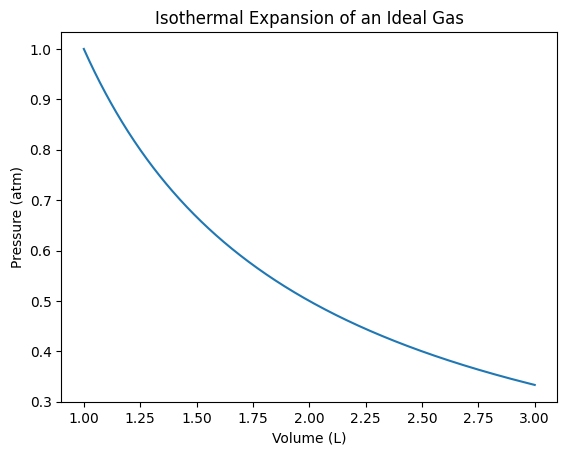

In [6]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt

## define parameters
V_i = 1.0  # initial volume [L]
P_i = 1.0  # initial pressure [atm]
T   = 300    # Temperature [Kelvin]
V_f = 3.0  # final volume [L]
R   = 0.0821 # ideal gas constant [L atm K^-1 mol^-1]

## number of moles (n) of the gas
n = (P_i * V_i) / (R * T)
## determmine the final pressure
P_f = (P_i * V_i) / V_f 

## generate values to plot
V_values = np.linspace(V_i, V_f, num=500)
P_values = (n * R * T) / V_values


## plot 
plt.plot(V_values, P_values)
plt.xlabel('Volume (L)')
plt.ylabel('Pressure (atm)')
plt.title('Isothermal Expansion of an Ideal Gas')
plt.show()

<hr style="height: 5px; background-color: black; border: none;">

## Problem 2 : Analyzing Star Cluster Data

### Objective
Analyze a dataset of stars in a star cluster and determine various properties such as the luminosity function, color-magnitude diagram, and the mass distribution.

### Dataset
You have been provided with a dataset (`star_cluster`) containing the following columns for stars in a star cluster:
- `ID`: Unique identifier for each star
- `RA`: Right Ascension (degrees)
- `DEC`: Declination (degrees)
- `Magnitude`: Apparent magnitude in a specific filter
- `Color_Index`: Difference in magnitude between two filters (e.g., B-V)
- `Mass`: Estimated mass of the star (solar masses)

### Tasks
1. Load the Data:  
   - Read the dataset from the CSV file into a Pandas DataFrame.

2. Basic Statistics:  
   - Calculate the mean, median, and standard deviation for the `Magnitude` and `Mass` columns.

3. Luminosity Function:  
   - Create a histogram of the `Magnitude` values to represent the luminosity function of the star cluster. Determine the number of stars in each magnitude bin.

4. Color-Magnitude Diagram (CMD):  
   - Plot the Color-Magnitude Diagram using `Color_Index` on the x-axis and `Magnitude` on the y-axis. Invert the y-axis to reflect the standard astronomical convention.

5. Mass Distribution:  
   - Plot the mass distribution of the stars in the cluster. Use a histogram to visualize the distribution of `Mass`.

6. Identify Main Sequence Stars:  
   - Assume main sequence stars have `Magnitude` values between `min_mag` and `max_mag`. Write a function to filter the main sequence stars and plot their distribution in the CMD.

7. Optional - Mass-Luminosity Relation:  
   - Using a theoretical mass-luminosity relation (e.g., $L \propto M^{3.5}$), estimate the luminosity of each star. Compare the theoretical luminosity with the observed data and discuss any discrepancies.

### Hints
- Use libraries such as Pandas, NumPy, and Matplotlib for data manipulation and visualization.
- Pay attention to the physical units of the data and the correct astronomical conventions when plotting.
- Consider any biases or limitations in the dataset that could affect the analysis.

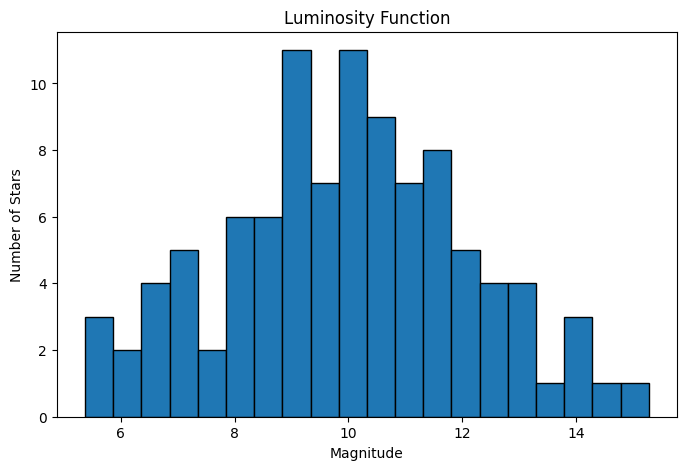

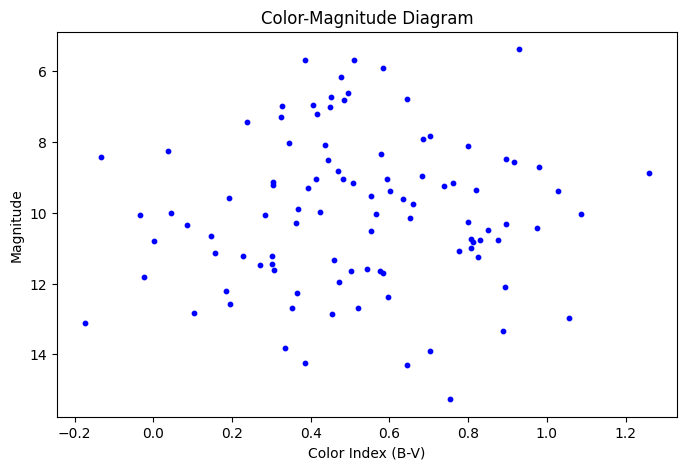

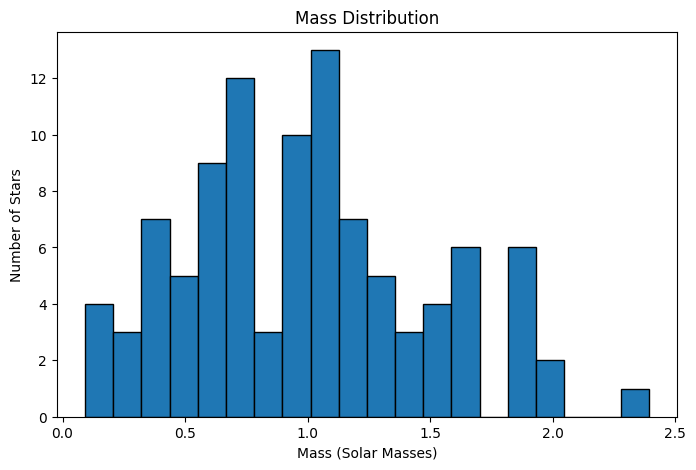

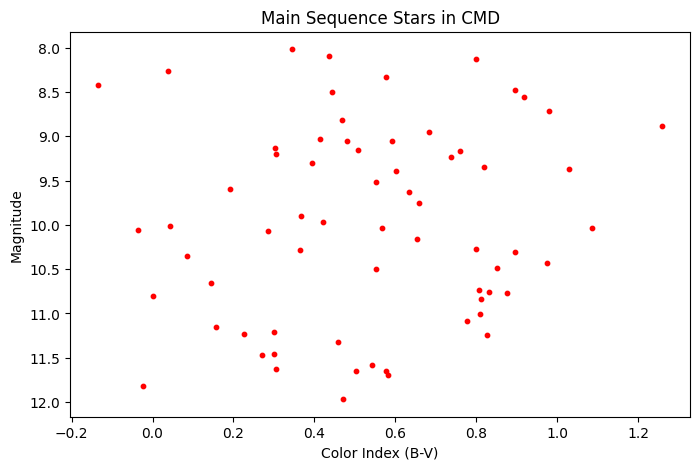

{'mean_magnitude': 9.976484063009574,
 'median_magnitude': 10.036265507589828,
 'std_magnitude': 2.135116832382735,
 'mean_mass': 0.990403296265998,
 'median_mass': 0.9708284829035437,
 'std_mass': 0.49212980667036554}

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## sample data 
data = {
    'ID': np.arange(1, 101),
    'RA': np.random.uniform(0, 360, 100),
    'DEC': np.random.uniform(-90, 90, 100),
    'Magnitude': np.random.normal(10, 2, 100),
    'Color_Index': np.random.normal(0.5, 0.3, 100),
    'Mass': np.random.normal(1, 0.5, 100)
}

# convert to Pandas DataFrame
df = pd.DataFrame(data)

# basic stats
mean_magnitude = df['Magnitude'].mean()
median_magnitude = df['Magnitude'].median()
std_magnitude = df['Magnitude'].std()

mean_mass = df['Mass'].mean()
median_mass = df['Mass'].median()
std_mass = df['Mass'].std()

## luminosity function (distribution)
plt.figure(figsize=(8, 5))
plt.hist(df['Magnitude'], bins=20, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Number of Stars')
plt.title('Luminosity Function')
plt.show()

## color-magnitude diagram (CMD)
plt.figure(figsize=(8, 5))
plt.scatter(df['Color_Index'], df['Magnitude'], color='blue', s=10)
plt.gca().invert_yaxis()  # Invert y-axis
plt.xlabel('Color Index (B-V)')
plt.ylabel('Magnitude')
plt.title('Color-Magnitude Diagram')
plt.show()

## mass Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Mass'], bins=20, edgecolor='black')
plt.xlabel('Mass (Solar Masses)')
plt.ylabel('Number of Stars')
plt.title('Mass Distribution')
plt.show()

# identify main sequence stars
def filter_main_sequence(df, min_mag, max_mag):
    return df[(df['Magnitude'] >= min_mag) & (df['Magnitude'] <= max_mag)]

main_sequence = filter_main_sequence(df, min_mag=8, max_mag=12)

plt.figure(figsize=(8, 5))
plt.scatter(main_sequence['Color_Index'], main_sequence['Magnitude'], color='red', s=10)
plt.gca().invert_yaxis()  # Invert y-axis
plt.xlabel('Color Index (B-V)')
plt.ylabel('Magnitude')
plt.title('Main Sequence Stars in CMD')
plt.show()

# basic statistics output
{
    "mean_magnitude": mean_magnitude,
    "median_magnitude": median_magnitude,
    "std_magnitude": std_magnitude,
    "mean_mass": mean_mass,
    "median_mass": median_mass,
    "std_mass": std_mass
}


In [4]:
# define a constant for the mass-luminosity relation. Here, we assume k = 1 for simplicity.
k = 1

# calculate the theoretical luminosity for each star
df['Theoretical_Luminosity'] = k * df['Mass'] ** 3.5

# display the first few rows to check the calculated luminosity
df[['ID', 'Mass', 'Theoretical_Luminosity']].head()


,ID,Mass,Theoretical_Luminosity
0,1,0.915716,0.734790
1,2,0.851984,0.570834
2,3,2.213626,16.138560
3,4,1.450387,3.674460
4,5,1.257695,2.231074
